<a href="https://colab.research.google.com/github/GabrielMartinzPereira/Cervejaria_IFSP-SRT/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
import scipy
import datetime
import numpy as np
import time
import copy
import statistics
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


# Extrair csv

In [ ]:
! pip install scapy
from scapy.all import rdpcap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444326 sha256=41fcc4e0bcdd316b1ae0f51677a3d6eeda156258010f184030158213a64a024b
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [ ]:
fileName = "/content/drive/MyDrive/TCC/Vazao/Vazao-L100-T65/Vazao_R-750_V-217_L-100_T-65.pcapng"
packets = rdpcap(fileName)

In [ ]:
flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

In [ ]:
actualSpeed = []
actualCurrent = []
actualTorque = []
actualPowerFactor = []
actualOutputVoltage = []
actualVoltage = []
FlowRate = []

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    #Caso o csv esteja em branco deve se comentar a linha abaixo.
    #if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-1000_V-320_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-1250_V-428_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-1500_V-537_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-1750_V-646_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-2000_V-767_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-2250_V-864_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-2500_V-959_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-2750_V-1100_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-3000_V-1293_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
fileName = "/content/drive/MyDrive/Vazao/Vazao-L100-T65/Vazao_R-3200_V-1425_L-100_T-65.pcapng"

packets = rdpcap(fileName)

flow=fileName.split(sep='/')
flow[len(flow)-1]
flow=flow[len(flow)-1].split(sep='_')
flow[len(flow)-3]
flow=flow[len(flow)-3].split(sep='-')
flow[len(flow)-1]
flow=flow[len(flow)-1]

for i in range(len(packets)):
  if packets[i].dst=="28:63:36:fa:6d:f0":
    if (packets[i].src+packets[i].dst == packets[0].src+packets[0].dst) and (len(packets[i].original)==60):
        b11 = str(hex(packets[i].original[len(packets[i].original)-37]))
        b11_1 = b11.split('0x')
        if len(b11_1[1]) == 1:
            b11='0'+b11_1[1]
        else:
            b11 = b11_1[1]

        b10 = str(hex(packets[i].original[len(packets[i].original)-36]))
        b10_1 = b10.split('0x')
        if len(b10_1[1]) == 1:
            b10='0'+b10_1[1]
        else:
            b10 = b10_1[1]

        b9 = str(hex(packets[i].original[len(packets[i].original)-35]))
        b9_1 = b9.split('0x')
        if len(b9_1[1]) == 1:
            b9='0'+b9_1[1]
        else:
            b9 = b9_1[1]

        b8 = str(hex(packets[i].original[len(packets[i].original)-34]))
        b8_1 = b8.split('0x')
        if len(b8_1[1]) == 1:
            b8='0'+b8_1[1]
        else:
            b8 = b8_1[1]

        b7 = str(hex(packets[i].original[len(packets[i].original)-33]))
        b7_1 = b7.split('0x')
        if len(b7_1[1]) == 1:
            b7='0'+b7_1[1]
        else:
            b7 = b7_1[1]

        b6 = str(hex(packets[i].original[len(packets[i].original)-32]))
        b6_1 = b6.split('0x')
        if len(b6_1[1]) == 1:
            b6='0'+b6_1[1]
        else:
            b6 = b6_1[1]

        b5 = str(hex(packets[i].original[len(packets[i].original)-31]))
        b5_1 = b5.split('0x')
        if len(b5_1[1]) == 1:
            b5='0'+b5_1[1]
        else:
            b5 = b5_1[1]

        b4 = str(hex(packets[i].original[len(packets[i].original)-30]))
        b4_1 = b4.split('0x')
        if len(b4_1[1]) == 1:
            b4='0'+b4_1[1]
        else:
            b4 = b4_1[1]

        b3 = str(hex(packets[i].original[len(packets[i].original)-29]))
        b3_1 = b3.split('0x')
        if len(b3_1[1]) == 1:
            b3='0'+b3_1[1]
        else:
            b3 = b3_1[1]

        b2 = str(hex(packets[i].original[len(packets[i].original)-28]))
        b2_1 = b2.split('0x')
        if len(b2_1[1]) == 1:
            b2='0'+b2_1[1]
        else:
            b2 = b2_1[1]

        b1 = str(hex(packets[i].original[len(packets[i].original)-27]))
        b1_1 = b1.split('0x')
        if len(b1_1[1]) == 1:
            b1='0'+b1_1[1]
        else:
            b1 = b1_1[1]

        b0 = str(hex(packets[i].original[len(packets[i].original)-26]))
        b0_1 = b0.split('0x')
        if len(b0_1[1]) == 1:
            b0='0'+b0_1[1]
        else:
            b0 = b0_1[1]

        actualOutputVoltage_support = '0x'+b1+b0
        actualOutputVoltage_support = (int(actualOutputVoltage_support,16)/int("4000",16))
        actualOutputVoltage.append(actualOutputVoltage_support)
        actualVoltage_support = '0x'+b3+b2
        actualVoltage_support = (int(actualVoltage_support,16)/int("4000",16))
        actualVoltage.append(actualVoltage_support)
        actualPowerFactor_support = '0x'+b5+b4
        actualPowerFactor_support = (int(actualPowerFactor_support,16)/int("4000",16))
        actualPowerFactor.append(actualPowerFactor_support)
        actualTorque_support = '0x'+b7+b6
        actualTorque_support = (int(actualTorque_support,16)/int("4000",16))
        actualTorque.append(actualTorque_support)
        actualCurrent_support = '0x'+b9+b8
        actualCurrent_support = (int(actualCurrent_support,16)/int("4000",16))
        actualCurrent.append(actualCurrent_support)
        actualSpeed_support = '0x'+b11+b10
        actualSpeed_support = (int(actualSpeed_support,16)/int("4000",16))
        actualSpeed.append(actualSpeed_support)
        FlowRate.append(flow)

In [ ]:
df = pd.DataFrame(FlowRate,
                  columns=['FlowRate'])

df['Speed'] = pd.DataFrame(actualSpeed,
                  columns=['Speed'])

df['Current'] = pd.DataFrame(actualCurrent,
                  columns=['Current'])

df['Torque'] = pd.DataFrame(actualTorque,
                  columns=['Torque'])

df['PowerFactor'] = pd.DataFrame(actualPowerFactor,
                  columns=['PowerFactor'])

df['OutputVoltage'] = pd.DataFrame(actualOutputVoltage,
                  columns=['OutputVoltage'])

df['ActualVoltage'] = pd.DataFrame(actualVoltage,
                  columns=['ActualVoltage'])

In [ ]:
df

,FlowRate,Speed,Current,Torque,PowerFactor,OutputVoltage,ActualVoltage
0,1750rpm.pcap,0.504639,0.524658,0.261841,0.466675,0.527771,0.481201
1,1750rpm.pcap,0.504639,0.524658,0.261841,0.466675,0.527771,0.481201
2,1750rpm.pcap,0.504639,0.524658,0.261841,0.466675,0.527771,0.481201
3,1750rpm.pcap,0.504639,0.523804,0.235779,0.398743,0.527771,0.480957
4,1750rpm.pcap,0.504639,0.523804,0.235779,0.398743,0.527771,0.480957
...,...,...,...,...,...,...,...
885564,1750rpm.pcap,0.504333,0.487305,0.129700,0.296814,0.504089,0.473999
885565,1750rpm.pcap,0.504333,0.487305,0.129700,0.296814,0.504089,0.473999
885566,1750rpm.pcap,0.504333,0.487305,0.129700,0.296814,0.504089,0.473999
885567,1750rpm.pcap,0.504333,0.487305,0.129700,0.296814,0.504089,0.473999


In [ ]:
df.to_csv(fileName+'.csv',index=False)

files.download(fileName+'.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Extrair Atributos

In [ ]:
header_row=['FlowRate','Speed','Current','Torque', 'PowerFactor', 'OutputVoltage', 'ActualVoltage', 'Level', 'Temperature']
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset.csv', names=header_row)

In [ ]:
df

,FlowRate,Speed,Current,Torque,PowerFactor,OutputVoltage,ActualVoltage,Level,Temperature
0,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
1,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
2,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
3,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
4,30,0.216125,0.536133,0.077515,0.268982,0.541382,0.212097,50,29
...,...,...,...,...,...,...,...,...,...
1269385,959,0.720459,0.515137,0.250732,0.367188,0.529907,0.676453,100,65
1269386,959,0.720459,0.515137,0.250732,0.367188,0.529907,0.676453,100,65
1269387,959,0.720459,0.524841,0.265869,0.381958,0.529907,0.676453,100,65
1269388,959,0.720459,0.524841,0.265869,0.381958,0.529907,0.676453,100,65


In [ ]:
dfExtract = []
FlowRate = []
Speed = []
auxC1 = []
auxC2 = []
auxC3 = []
auxT1 = []
auxT2 = []
auxT3 = []
auxP1 = []
auxP2 = []
auxP3 = []
auxOV1 = []
auxOV2 = []
auxOV3 = []
auxAV1 = []
auxAV2 = []
auxAV3 = []
Temperature = []

inc = 1000  #100 = 1s  || 1000 = 10s
for i in range(0,len(df),inc):
  if df.FlowRate[i]>=100 and df.FlowRate[i]<=1100:
    if len(df)>i+inc:
      if df.FlowRate[i] == df.FlowRate[i+inc]:
        aux_1=statistics.mean(df.FlowRate[i:i+inc])
        FlowRate.append(aux_1)

        aux_1=statistics.mean(df.Speed[i:i+inc])
        Speed.append(aux_1)

        aux_1=statistics.mean(df.Current[i:i+inc])
        auxC1.append(aux_1)
        aux_1=statistics.stdev(df.Current[i:i+inc])
        auxC2.append(aux_1)
        aux_1=statistics.variance(df.Current[i:i+inc])
        auxC3.append(aux_1)

        aux_1=statistics.mean(df.Torque[i:i+inc])
        auxT1.append(aux_1)
        aux_1=statistics.stdev(df.Torque[i:i+inc])
        auxT2.append(aux_1)
        aux_1=statistics.variance(df.Torque[i:i+inc])
        auxT3.append(aux_1)

        aux_1=statistics.mean(df.PowerFactor[i:i+inc])
        auxP1.append(aux_1)
        aux_1=statistics.stdev(df.PowerFactor[i:i+inc])
        auxP2.append(aux_1)
        aux_1=statistics.variance(df.PowerFactor[i:i+inc])
        auxP3.append(aux_1)

        aux_1=statistics.mean(df.OutputVoltage[i:i+inc])
        auxOV1.append(aux_1)
        aux_1=statistics.stdev(df.OutputVoltage[i:i+inc])
        auxOV2.append(aux_1)
        aux_1=statistics.variance(df.OutputVoltage[i:i+inc])
        auxOV3.append(aux_1)

        aux_1=statistics.mean(df.ActualVoltage[i:i+inc])
        auxAV1.append(aux_1)
        aux_1=statistics.stdev(df.ActualVoltage[i:i+inc])
        auxAV2.append(aux_1)
        aux_1=statistics.variance(df.ActualVoltage[i:i+inc])
        auxAV3.append(aux_1)

        aux_1=statistics.mean(df.Temperature[i:i+inc])
        Temperature.append(aux_1)

In [ ]:
dfExtract = pd.DataFrame(FlowRate,columns=['FlowRate'])
dfExtract['Speed'] = pd.DataFrame(Speed)
dfExtract['mean_Current'] = pd.DataFrame(auxC1)
dfExtract['stdev_Current'] = pd.DataFrame(auxC2)
dfExtract['variance_Current'] = pd.DataFrame(auxC3)
dfExtract['mean_Torque'] = pd.DataFrame(auxT1)
dfExtract['stdev_Torque'] = pd.DataFrame(auxT2)
dfExtract['variance_Torque'] = pd.DataFrame(auxT3)
dfExtract['mean_PowerFactor'] = pd.DataFrame(auxP1)
dfExtract['stdev_PowerFactor'] = pd.DataFrame(auxP2)
dfExtract['variance_PowerFactor'] = pd.DataFrame(auxP3)
dfExtract['mean_OutputVoltage'] = pd.DataFrame(auxOV1)
dfExtract['stdev_OutputVoltage'] = pd.DataFrame(auxOV2)
dfExtract['variance_OutputVoltage'] = pd.DataFrame(auxOV3)
dfExtract['mean_ActualVoltage'] = pd.DataFrame(auxAV1)
dfExtract['stdev_ActualVoltage'] = pd.DataFrame(auxAV2)
dfExtract['variance_ActualVoltage'] = pd.DataFrame(auxAV3)

In [ ]:
dfExtract

,FlowRate,Speed,mean_Current,stdev_Current,variance_Current,mean_Torque,stdev_Torque,variance_Torque,mean_PowerFactor,stdev_PowerFactor,variance_PowerFactor,mean_OutputVoltage,stdev_OutputVoltage,variance_OutputVoltage,mean_ActualVoltage,stdev_ActualVoltage,variance_ActualVoltage
0,392,0.432251,0.506496,0.012761,0.000163,0.136486,0.022991,0.000529,0.267202,0.032490,0.001056,0.507004,0.000658,4.330715e-07,0.407166,0.000206,4.230944e-08
1,392,0.432251,0.507051,0.012574,0.000158,0.136281,0.022535,0.000508,0.267282,0.032140,0.001033,0.505057,0.001641,2.693543e-06,0.407091,0.000177,3.141402e-08
2,392,0.432251,0.504912,0.012154,0.000148,0.135505,0.022461,0.000505,0.267253,0.032129,0.001032,0.505900,0.000906,8.204928e-07,0.407095,0.000222,4.917234e-08
3,392,0.432251,0.507300,0.012437,0.000155,0.136242,0.022927,0.000526,0.267900,0.032735,0.001072,0.508110,0.001639,2.687919e-06,0.407155,0.000200,4.009339e-08
4,392,0.432251,0.505872,0.012046,0.000145,0.136125,0.022326,0.000498,0.267470,0.032001,0.001024,0.505853,0.002369,5.613398e-06,0.407113,0.000181,3.283045e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,959,0.720459,0.530690,0.013428,0.000180,0.269788,0.020125,0.000405,0.408669,0.027405,0.000751,0.530807,0.001569,2.461727e-06,0.676636,0.000117,1.379724e-08
1122,959,0.720459,0.531069,0.012771,0.000163,0.267695,0.020267,0.000411,0.412478,0.027351,0.000748,0.532033,0.001070,1.145815e-06,0.676511,0.000090,8.020341e-09
1123,959,0.720459,0.528606,0.013306,0.000177,0.263454,0.019984,0.000399,0.410050,0.028962,0.000839,0.529517,0.000958,9.185996e-07,0.676241,0.000117,1.361479e-08
1124,959,0.720459,0.528782,0.012900,0.000166,0.266647,0.019438,0.000378,0.406379,0.026939,0.000726,0.527616,0.001202,1.445019e-06,0.676300,0.000106,1.125418e-08


In [ ]:
dfExtract.to_csv('dataset-Extract10sReduzido'+'.csv',index=False)

files.download('dataset-Extract10sReduzido'+'.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Programa Sem Extração de Atributos

## Inicio

In [ ]:
header_row=['FlowRate','Speed','Current','Torque', 'PowerFactor', 'OutputVoltage', 'ActualVoltage', 'Level', 'Temperature']
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset.csv', names=header_row)

In [ ]:
x = df.drop(['FlowRate'], axis = 1)
y = df['FlowRate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
df

,FlowRate,Speed,Current,Torque,PowerFactor,OutputVoltage,ActualVoltage,Level,Temperature
0,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
1,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
2,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
3,30,0.216125,0.550110,0.083435,0.240540,0.541565,0.212097,50,29
4,30,0.216125,0.536133,0.077515,0.268982,0.541382,0.212097,50,29
...,...,...,...,...,...,...,...,...,...
1269385,959,0.720459,0.515137,0.250732,0.367188,0.529907,0.676453,100,65
1269386,959,0.720459,0.515137,0.250732,0.367188,0.529907,0.676453,100,65
1269387,959,0.720459,0.524841,0.265869,0.381958,0.529907,0.676453,100,65
1269388,959,0.720459,0.524841,0.265869,0.381958,0.529907,0.676453,100,65


In [ ]:
#sns.pairplot(df)

In [ ]:
#plt.plot(df.Speed,df.FlowRate,'ro')
#plt.title('Speed')

In [ ]:
#plt.plot(df.Current[1:100]*3.08)
#plt.title('Current')

In [ ]:
#plt.plot(df.Speed*3470,df.FlowRate)

## Pycaret

In [ ]:
pip install --pre pycaret

In [ ]:
!pip install pycaret

In [ ]:
data=df

In [ ]:
from pycaret.regression import *
clf=setup(data=df,target='FlowRate')

,Description,Value
0,Session id,194
1,Target,FlowRate
2,Target type,Regression
3,Original data shape,"(1269390, 9)"
4,Transformed data shape,"(1269390, 9)"
5,Transformed train set shape,"(888573, 9)"
6,Transformed test set shape,"(380817, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.8844,605.6029,24.6090,0.9945,0.1870,0.1010
1,18.9155,604.5811,24.5882,0.9945,0.1841,0.0989
2,18.9627,610.3231,24.7047,0.9945,0.1867,0.1007
3,18.9400,607.4300,24.6461,0.9944,0.1847,0.0992
4,18.9456,607.3737,24.6450,0.9945,0.1870,0.1010
5,18.9093,604.4827,24.5862,0.9945,0.1862,0.1004
6,18.9393,605.9229,24.6155,0.9945,0.1861,0.1004
7,19.0125,614.1944,24.7829,0.9944,0.1832,0.0982
8,18.9862,609.5564,24.6892,0.9945,0.1866,0.1010


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.9708,609.6467,24.6910,0.9945,0.1866,0.1005
1,18.9114,605.7924,24.6129,0.9945,0.1855,0.1001
2,18.9973,611.1359,24.7212,0.9945,0.1861,0.1001
3,19.0141,610.9491,24.7174,0.9945,0.1848,0.0994
4,18.8622,602.4143,24.5441,0.9945,0.1854,0.1001
5,18.9175,606.6976,24.6312,0.9945,0.1857,0.0999
6,18.9135,605.6029,24.6090,0.9945,0.1848,0.0995
7,19.0687,613.3335,24.7656,0.9945,0.1878,0.1021
8,18.9019,606.1894,24.6209,0.9945,0.1839,0.0991


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Treinamentos

### Bayesian Ridge

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
br
br.fit(x_train, y_train)

BayesianRidge()

In [ ]:
br.coef_

array([ 1.34065081e+04,  8.12724939e+01,  7.85382570e+00, -3.54221156e+01,
        2.45801212e+03, -1.29513720e+04,  2.79695582e+00,  1.54680942e+00])

In [ ]:
br.intercept_

-1634.2878791298745

In [ ]:
y_pred = br.predict(x_test)
Erro = y_pred - y_test;

In [ ]:
Erro.mean()

0.034939576616097874

In [ ]:
Erro.std()

24.62600404180711

In [ ]:
mean_squared_error(y_test, y_pred)

606.4393848787794

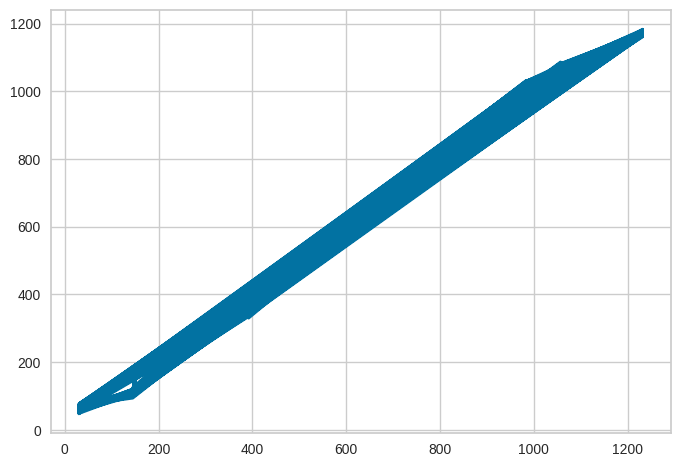

In [ ]:
plt.plot(y_test[1:10000],y_pred[1:10000])

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#lr = LinearRegression(n_jobs=-1)
lr
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
lr.coef_

array([ 1.34134091e+04,  8.23413870e+01,  7.57138673e+00, -3.50494174e+01,
        2.45763859e+03, -1.29588819e+04,  2.79697202e+00,  1.54681757e+00])

In [ ]:
lr.intercept_

-1634.6285783546195

In [ ]:
y_pred = lr.predict(x_test)
Erro = y_pred - y_test;

In [ ]:
Erro.mean()

0.03381236722331493

In [ ]:
Erro.std()

24.62648475053078

In [ ]:
mean_squared_error(y_test, y_pred)

606.4629834073613

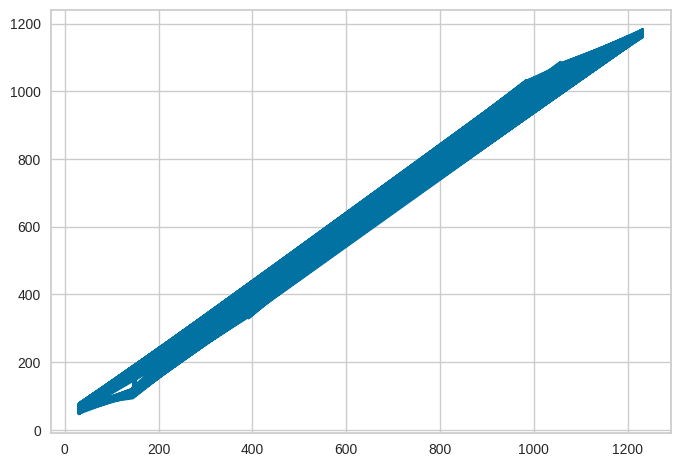

In [ ]:
plt.plot(y_test[1:10000],y_pred[1:10000])

### RNA

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#### lbfgs

In [ ]:
#clf = MLPClassifier(hidden_layer_sizes=(3,3), activation="identity", solver='lbfgs', alpha=1e-5, random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(10,100,10,100,10), activation="identity", solver='lbfgs', alpha=1e-5, random_state=1)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
Erro = prediction - y_test;

In [ ]:
clf.coefs_

[array([[-7.56214287e-002,  5.23921023e+000,  4.16247529e-003,
         -1.21870772e-002, -3.54099750e-296,  6.35055718e+000,
          4.66375337e+000, -9.20982246e-002,  6.71161975e+000,
         -4.91649921e+000, -1.66050062e-315, -9.08030418e+000,
          5.38930642e+000,  5.34017641e+000,  5.21868894e+000,
          5.92495797e+000,  5.59288501e+000, -1.74487148e-316,
          5.61800715e+000,  1.59753798e-002, -1.71642483e-002,
          6.73900318e+000, -4.43081634e-004,  5.37866318e+000,
          5.98965999e+000, -6.92429606e-291,  4.77552552e+000,
          5.55963490e+000,  6.40591099e+000,  5.70895331e+000,
         -3.22674298e-002,  6.31320202e+000, -5.22077853e+000,
          3.88098096e-315,  5.70744722e+000,  6.71263467e+000,
         -5.61258804e+000,  5.76152465e-297,  5.49187612e+000,
          2.08298817e-305,  1.77557276e-001,  1.21865141e-002,
         -3.18622510e-308,  5.28459648e+000, -6.57772837e+000,
          5.55033274e+000,  1.46716026e-001, -8.0440364

In [ ]:
Erro.mean()

0.4081307309374161

In [ ]:
Erro.std()

20.229788358798675

In [ ]:
mean_squared_error(prediction, y_test)

409.4096181594082

#### sgd

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,10), activation="identity", solver='sgd', alpha=1e-5, random_state=1)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
Erro = prediction - y_test;

In [ ]:
Erro.mean()

0.0

In [ ]:
Erro.std()

0.0

In [ ]:
mean_squared_error(prediction, y_test)

0.0

#### adam

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,10), activation="identity", solver='adam', alpha=1e-5, random_state=1)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
Erro = prediction - y_test;

In [ ]:
Erro.mean()

0.0

In [ ]:
Erro.std()

0.0

In [ ]:
mean_squared_error(y_test, prediction)

0.0

In [ ]:
plt.plot(prediction,y_test)

Error in callback <function _draw_all_if_interactive at 0x79ad5e469480> (for post_execute):


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 800x550 with 1 Axes>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(clf, x, y, cv=10, scoring='r2')
print(scores)
print("Valor médio de R2: %0.2f   Com desvio padrão de %0.2f" % (scores.mean(), scores.std()))

[0.96526146 0.62888482 0.99951259 0.98603441 0.99878541 0.94812932
 0.96222775 0.95884438 0.97710435 0.56755855]
Valor médio de R2: 0.90   Com desvio padrão de 0.15


# Programa Dados Extraidos

## Inicio

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset-Extract10s.csv')

In [ ]:
header_row=['FlowRate','Speed','Current','Torque', 'PowerFactor', 'OutputVoltage', 'ActualVoltage', 'Level', 'Temperature']
df = pd.read_csv('/content/drive/MyDrive/TCC/dataset.csv', names=header_row)

In [ ]:
df

,FlowRate,Speed,mean_Current,stdev_Current,variance_Current,mean_Torque,stdev_Torque,variance_Torque,mean_PowerFactor,stdev_PowerFactor,variance_PowerFactor,mean_OutputVoltage,stdev_OutputVoltage,variance_OutputVoltage,mean_ActualVoltage,stdev_ActualVoltage,variance_ActualVoltage
0,30,0.216125,0.541426,0.012170,0.000148,0.092236,0.021150,0.000447,0.266907,0.026362,0.000695,0.540174,0.001166,1.358514e-06,0.212099,0.000139,1.931149e-08
1,30,0.216125,0.539648,0.011990,0.000144,0.091749,0.021116,0.000446,0.266125,0.026630,0.000709,0.540184,0.001256,1.577806e-06,0.212080,0.000135,1.809076e-08
2,30,0.216125,0.538811,0.011444,0.000131,0.090854,0.021546,0.000464,0.265356,0.027069,0.000733,0.538026,0.001160,1.345220e-06,0.212023,0.000131,1.726065e-08
3,30,0.216125,0.539387,0.011712,0.000137,0.091526,0.020430,0.000417,0.265930,0.025807,0.000666,0.537854,0.001281,1.641941e-06,0.212055,0.000140,1.952359e-08
4,30,0.216125,0.540120,0.011653,0.000136,0.091755,0.020349,0.000414,0.266422,0.025573,0.000654,0.539824,0.001750,3.061561e-06,0.212110,0.000122,1.485289e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,959,0.720459,0.530690,0.013428,0.000180,0.269788,0.020125,0.000405,0.408669,0.027405,0.000751,0.530807,0.001569,2.461727e-06,0.676636,0.000117,1.379724e-08
1246,959,0.720459,0.531069,0.012771,0.000163,0.267695,0.020267,0.000411,0.412478,0.027351,0.000748,0.532033,0.001070,1.145815e-06,0.676511,0.000090,8.020341e-09
1247,959,0.720459,0.528606,0.013306,0.000177,0.263454,0.019984,0.000399,0.410050,0.028962,0.000839,0.529517,0.000958,9.185996e-07,0.676241,0.000117,1.361479e-08
1248,959,0.720459,0.528782,0.012900,0.000166,0.266647,0.019438,0.000378,0.406379,0.026939,0.000726,0.527616,0.001202,1.445019e-06,0.676300,0.000106,1.125418e-08


In [ ]:
#x = df[['Speed', 'mean_Current', 'mean_Torque', 'mean_PowerFactor', 'mean_OutputVoltage', 'mean_ActualVoltage']]
x = df[['Speed']]
y = df['FlowRate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
x = df.drop(['FlowRate'], axis = 1)
y = df['FlowRate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
lr.coef_

array([4253.66592937])

In [ ]:
lr.intercept_

-1601.5332428210245

In [ ]:
y_pred = lr.predict(x_test)
Erro = y_pred - y_test;

In [ ]:
Erro.mean()

20.091205423931658

In [ ]:
Erro.std()

270.25069268646814

In [ ]:
np.mean((y_test - y_pred)**2)#Erro Quadratico Médio

73180.10252191836

In [ ]:
np.mean(np.abs(y_test - y_pred) / y_test)*100 #Erro Percentual Absoluto

72.15011257327106

### RNA

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import joblib

#### lbfgs

In [ ]:
#['FlowRate','Speed','Current','Torque', 'PowerFactor', 'OutputVoltage', 'ActualVoltage']
#x = df[['Speed', 'mean_Current', 'mean_Torque', 'mean_PowerFactor', 'mean_OutputVoltage', 'mean_ActualVoltage']]
x = df[['Speed']]
y = df['FlowRate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
x = df.drop(['FlowRate'], axis = 1)
y = df['FlowRate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# adam   lbfgs  alpha=1e-5
clf = MLPClassifier(hidden_layer_sizes=(10,100,10,100,10), activation="identity", solver='lbfgs', alpha=1e-5 , random_state=1, max_iter = 10000)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
Erro = prediction - y_test;

In [ ]:
#Baixa Modelo
joblib.dump(clf, 'my_model.pkl', compress=9)
files.download('my_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#importa Modelo
#model_clone = joblib.load('my_model.pkl')
#prediction = model_clone.predict(x_test)
#Erro = prediction - y_test;

In [ ]:
Erro.mean()

0.0

In [ ]:
Erro.std()

0.0

In [ ]:
np.mean((y_test - prediction)**2) #Erro Quadratico Médio

0.0

In [ ]:
np.mean(np.abs(y_test - prediction) / y_test)*100 #Erro Percentual Absoluto

0.0

#### sgd

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,100,10,100,10), activation="identity", solver='sgd', alpha=1e-5, random_state=1, max_iter = 10000)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
Erro = prediction - y_test;

In [ ]:
Erro.mean()

13.134111707163143

In [ ]:
Erro.std()

83.3126451640518

In [ ]:
mean_absolute_error(prediction, y_test)

42.53834017040076

In [ ]:
mean_squared_error(prediction, y_test)

7111.311454717576

#### adam

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,100,10,100,10), activation="identity", solver='adam', alpha=1e-5, random_state=1, max_iter = 10000)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)
Erro = prediction - y_test;

In [ ]:
Erro.mean()

2.3275481224360997

In [ ]:
Erro.std()

52.26366963015402

In [ ]:
mean_absolute_error(prediction, y_test)

17.984222152098454

In [ ]:
mean_squared_error(y_test, prediction)

2736.0467024297886

In [ ]:
#from sklearn.model_selection import cross_val_score
#from sklearn import metrics
#scores = cross_val_score(clf, x, y, cv=10, scoring='r2')
#print(scores)
#print("Valor médio de R2: %0.2f   Com desvio padrão de %0.2f" % (scores.mean(), scores.std()))